### Import data

In [4]:
include("importData.jl")
include("DDEmodel.jl")
include("plot.jl")

# import data from the path
pop, g2, g1, g2_0, g1_0 = get_data("..//data//lap.csv", "..//data//lap_pop.csv"); # in which:
# pop: population data
# g1, g2: g1 and g2 data
# initial: initial number of cells in g1 and in g2 at time 0

# This is to load the estimated parameters to be used as "initial guess"
param_lap_dde = CSV.read(".//figures//Lapatinib//params_lap_DDE.csv")

# initial guesses for the parameters
lap = convert(Matrix, param_lap_dde[1:7,2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/Hill/one_state_model/model/importData.jl:29


### Estimate 

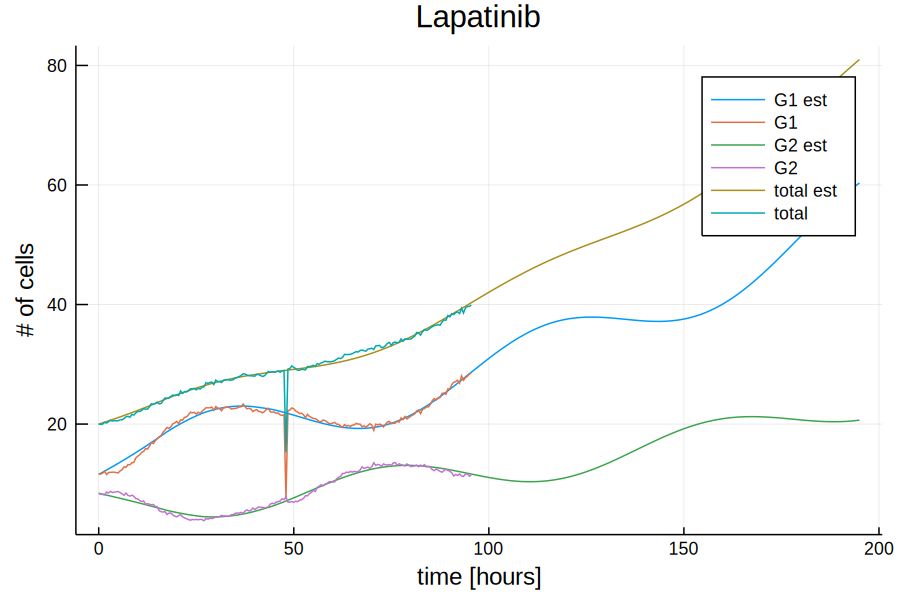

In [13]:
# i is the number of the column we are using from the data (# of trial)
i = 6

# initial guess
p = [0.02798, 0.025502, 21.3481, 10.2881, 0.0001, 0.0001]

# lower and upper bound set for parameters
low = [0.015, 0.003, 3.0, 7.0, 0.0001, 0.0001]
upp = [0.075, 0.075, 30.0, 100.0, 0.05, 0.05]

# Estimating the parameters for trial i
params = optimIt(p, low, upp, i, g1, g2)

# Plotting the long-term prediction along with the data for trial i
plotIt(params, g1, g2, g1_0, g2_0, pop, i, "Lapatinib")